# Preprocessing


In [5]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np


brecan_df = fetch_ucirepo(id=17) 
X = brecan_df.data.features 
y = brecan_df.data.targets 


expected_columns = [
    'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 
    'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
    'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 
    'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
    'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 
    'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
]

def calculate_cancer_score(df):
    """
    Calculate cancer score based on fractal dimensions.
    """
    def assign_risk_score(value):
        if value >= 0.08:
            return 3  # high
        elif value >= 0.07:
            return 2  # moderate
        elif value >= 0.05:
            return 1  # low
        return 0  # below threshold
    
    # Calculate risk scores
    df['risk_score1'] = df['fractal_dimension1'].apply(assign_risk_score)
    df['risk_score2'] = df['fractal_dimension2'].apply(assign_risk_score)
    
    # Calculate final cancer score
    df['cancer_score'] = (df['risk_score1'] + df['risk_score2']) / 2
    
    # Add risk category
    df['risk_category'] = df['cancer_score'].apply(
        lambda x: 'High' if x >= 2.5 else 'Moderate' if x >= 1.5 else 'Low'
    )
    
    return df

def process_breast_cancer_data():
   
    processed_df = X.copy()
   
    processed_df = calculate_cancer_score(processed_df)
    
    
    X_train, X_test, y_train, y_test = train_test_split(processed_df, y, test_size=0.3, random_state=42)
    
    return processed_df, X_train, X_test, y_train, y_test
processed_df, X_train, X_test, y_train, y_test = process_breast_cancer_data()
print("\nFirst few rows of processed DataFrame with cancer scores:")
print(processed_df[['fractal_dimension1', 'fractal_dimension2', 'risk_score1', 'risk_score2', 'cancer_score', 'risk_category']].head())

columns = [col for col in expected_columns if col in X.columns]
class_labels = LabelEncoder()

brecan_df= pd.get_dummies(X[columns])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_encoded = pd.get_dummies(X)
X_with_score = calculate_cancer_score(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
brecan_df.head()


First few rows of processed DataFrame with cancer scores:
   fractal_dimension1  fractal_dimension2  risk_score1  risk_score2  \
0             0.07871            0.006193            2            0   
1             0.05667            0.003532            1            0   
2             0.05999            0.004571            1            0   
3             0.09744            0.009208            3            0   
4             0.05883            0.005115            1            0   

   cancer_score risk_category  
0           1.0           Low  
1           0.5           Low  
2           0.5           Low  
3           1.5      Moderate  
4           0.5           Low  


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# RANDOM FOREST


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
feature_columns = [col for col in processed_df.columns if col not in ['risk_score1', 'risk_score2', 'cancer_score', 'risk_category']]
X = processed_df[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf.feature_importances_
})




c:\Users\19133\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy: 0.97


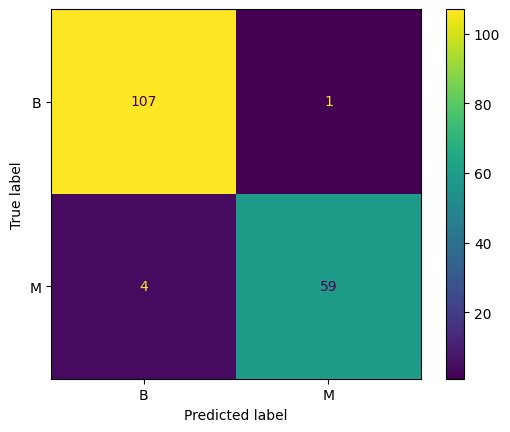

In [11]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

[0.03231189 0.0110639  0.06009233 0.05381045 0.00622336 0.00921566
 0.08055702 0.14193444 0.00327807 0.00314028 0.01643496 0.00317191
 0.01176976 0.02953842 0.00588079 0.00459638 0.0058159  0.00338232
 0.00400077 0.00713457 0.07797475 0.01878567 0.07429212 0.11821686
 0.01176917 0.01753909 0.04107958 0.12713638 0.01292945 0.00692376] Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


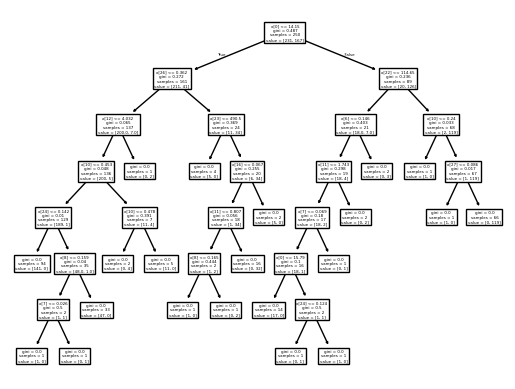

In [12]:
#recall
59/(59+4)
print(rf.feature_importances_, X.columns)
import matplotlib.pyplot as plt
rf_tree = rf.estimators_[7]
tree.plot_tree(rf_tree)
plt.savefig("rf_tree.svg")

# SVC

SVM Model Accuracy: 0.98


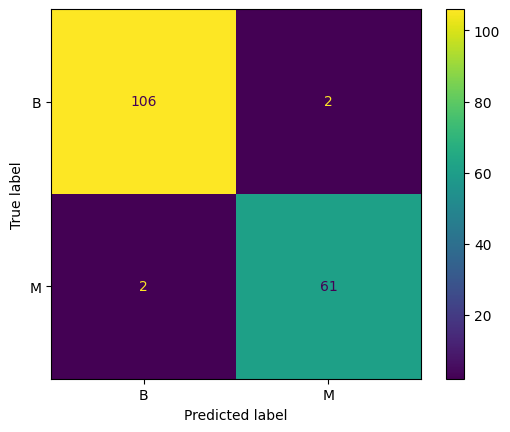

In [14]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
feature_columns = [col for col in processed_df.columns if col not in ['risk_score1', 'risk_score2', 'cancer_score', 'risk_category']]
X = processed_df[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
classifier = make_pipeline(scaler, SVC(gamma='auto'))
classifier.fit(X_train, y_train.values.ravel())
y_pred_svc = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_svc)
print(f"SVM Model Accuracy: {accuracy:.2f}")

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

# PCA + Logistic Regression

c:\Users\19133\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\19133\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Explained Variance Ratio:
[0.4316748  0.19845652 0.09733159 0.06531574 0.05212151 0.0419896
 0.02263461 0.01682669 0.0129469  0.0120941  0.01057185 0.00899278
 0.00809411]
Total variance explained: 0.98

Original Model Score: 0.9707602339181286

PCA Model Score: 0.9824561403508771


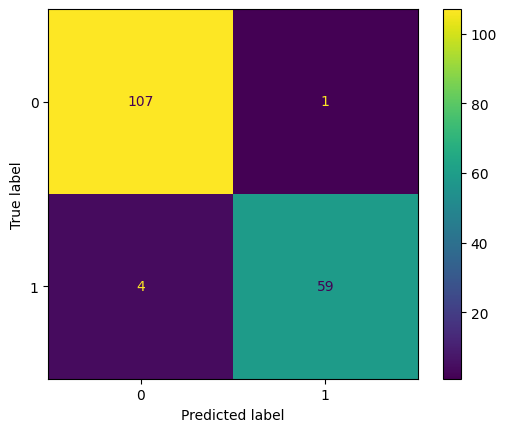

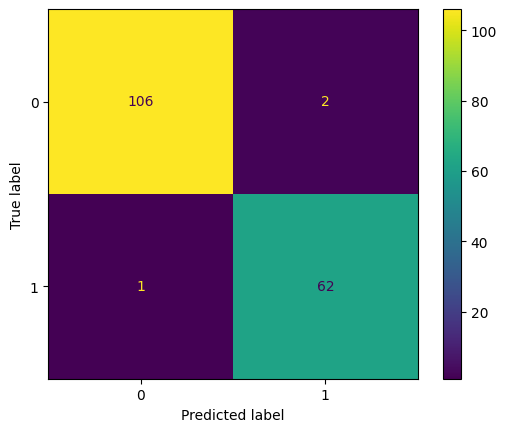

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_with_score = X_with_score.reset_index(drop=True)


X_train, X_test, y_train, y_test = train_test_split(
    X_with_score.drop(['cancer_score', 'risk_score1', 'risk_score2', 'risk_category'], axis=1, errors='ignore'),
    y_encoded,
    test_size=0.3,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance)
print(f"Total variance explained: {sum(explained_variance):.2f}")

# Original Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train.ravel())
y_predicted = model.predict(X_test)

print("\nOriginal Model Score:", model.score(X_test, y_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

pca_model = LogisticRegression(random_state=42)
pca_model.fit(X_train_pca, y_train.ravel())

print("\nPCA Model Score:", pca_model.score(X_test_pca, y_test))
ConfusionMatrixDisplay.from_estimator(pca_model, X_test_pca, y_test)

# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_with_score.drop(['cancer_score', 'cancer_risk'], axis=1, errors='ignore'),
    y_encoded,
    test_size=0.3,
    random_state=42
)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))
print(knn.score(X_test, y_test))

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
<class 'numpy.ndarray'>
0.9590643274853801


In [16]:
agg_X = X_with_score.groupby('cancer_risk').count()
agg_X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,cancer_score
cancer_risk,,,,,,,,,,,,,,,,,,,,,
1,569,569,569,569,569,569,569,569,569,569,...,569,569,569,569,569,569,569,569,569,569


<Axes: ylabel='cancer_score'>

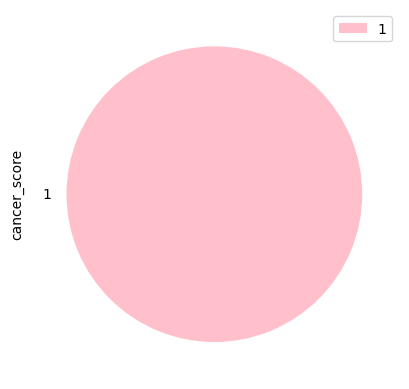

In [17]:
colors = ['pink','blue','red','orange','green','yellow']
agg_X.plot(kind="pie", y = "cancer_score", colors=colors)